<font size="5"> Summary </font>


In this analysis, primary goal is to find the factors that impact transmission rate of COVID-19. 
To be very precise, i am trying to answer the below question:

***What role does temperature and relative humidity play in the transmission of COVID-19 ?***

And the answer is:

**It plays a very significant role. Warmer the place, better for us ! Onset of summers should bring good news ! ** 

Kindly have a good look at the figure given below. Rest of my analysis predominantly revolves around this.

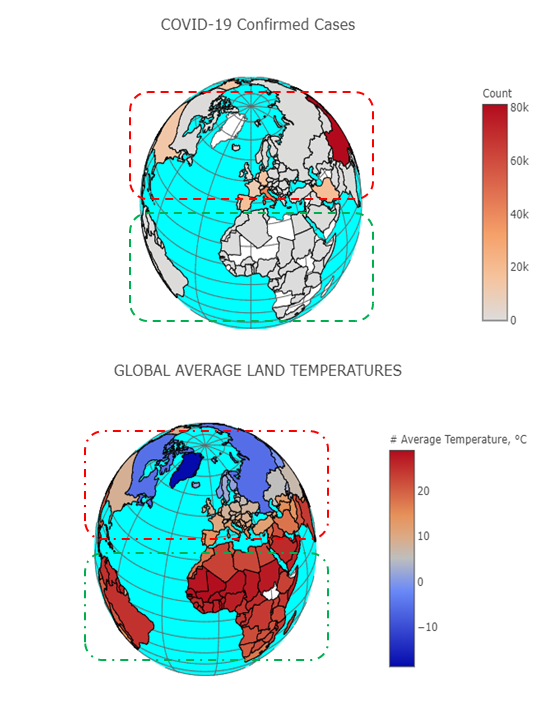

**Red rectangle (Temperate zone) is a cause of concern. Green rectangle (Tropical zone) is safer. **
However, for more clarity, you can zoom and pan the actual visuals in this notebook.

The below research paper also substantiates my insights. I would quote certain excerpts, directly from this paper, in this report.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3311988/

,<font size="4">Section 1: Data Preperation</font>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Loading datasets required for analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

Step 1: Reading and understanding the data

In [ ]:
full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
full_table.head()

The above shows the headers and a top slice of the table. I think this is self-explanatory.

Step 2: Preparing the data

In [ ]:
# Defining COVID-19 cases as per classifications 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Defining Active Case: Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# Renaming Mainland china as China in the data table
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Country/Region'].str.contains('Cruise Ship')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

Step 3: Creating a consolidated table , which gives the country wise total defined cases 

In [ ]:
temp = full_table.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()

In [ ]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

In [ ]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

**Finally, this is how the table looks like and our analysis is baselined with this table**

In [ ]:
temp_f.head(10)

<font size="4">Section 2: Data Visualisation</font>

In this section, we are just going to see four self-explanatory visuals, which will substantiate the answers and insights in the next section.


**Visual 1 :** A Time-series graph of the confirmed and recovered cases of COVID-19

In [ ]:
import plotly as py
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING

#Time Series plot for knwoing the spread

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=full_table.Date,
                y=full_table['Confirmed'],
                name="Confirmed",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=full_table.Date,
                y=full_table['Recovered'],
                name="Recovered",
                line_color='dimgray',
                opacity=0.8))
fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)
py.offline.iplot(fig)

**HOT SPOT 1 :**
1. Confirmed cases increasing steeply between 1st week of Feb to 3rd week of Feb
1. Recovered cases increasing steeply from 4th week of March
1. Rate of increase of confirmed cases significantly drops from March 1st week

**Visual 2 :** The pandemic and the planet - A live display of how the planet is with respect to confirmed cases of COVID-19.

Please pan the globe to check out the your zone, region , country. 

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Calculating the count of confirmed cases by country

countries = np.unique(temp_f['Country/Region'])
mean_conf = []
for country in countries:
    mean_conf.append(temp_f[temp_f['Country/Region'] == country]['Confirmed'].sum())
    
# Building the dataframe

    data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_conf,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Count')
            )
       ]
    
# Building the visual

    layout = dict(
    title = 'COVID-19 Confirmed Cases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

**Visual 3 :** Planet Earth - Hot or Cold? ! - A live display of the average land temperatures of the planet

Sub-step: To read and understand the data

In [ ]:
import pandas as pd
global_temp_country = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")

In [ ]:
global_temp_country.head()

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

## Removing the duplicates

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Calculating average temperature by country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

# Building the data frame
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

# Building the visual

layout = dict(
    title = 'GLOBAL AVERAGE LAND TEMPERATURES',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

**Visual 4 :** Display of progression of spread across the globe

In [ ]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Progression of spread of COVID-19')
fig.update(layout_coloraxis_showscale=False)
py.offline.iplot(fig)

**HOT SPOT 2 :** The spread is much more than in the temperate zone of the planet compared to tropical zones. 
Moreover,  drier parts of the world has lesser transmission. 
You , can play this multiple times to get a deeper understanding

<font size="4"> Section 3: Discussion and closing comments </font>


I would like to keep this section short and sweet. However, i would urge the readers to pan and zoom all the visuals in the previous section to get more clarity on the following answers and insights. 

Also, please revisit the HOT-SPOTs in the earlier sections for help. Apologies, if i am making it too obvious or formal !

**3.1  My insights on the above analysis**

1. Temperature is a very important factor for the virus to thrive. 
1. The virus would not be be able to thrive in warmer climates or surroundings
1. The rate of transmission now is maximum in the temperate zone of the planet, where the avg. temp is 5-10 deg C
1. The above mentioned temp range is conducive for the virus to thrive
1. However, the transmission is minimal in the tropical zone, where the avg. temp is > 25 deg C

**3.2 Substantiation from research**

I would like to provide an evedential excerpt from the earlier mentioned research paper, for your reference here, as below. 


*In the early 1960s, Schulman and Kilbourne developed an influenza virus transmission model in mice. Although mouse-to-mouse transmission is relatively inefficient, they still observed a significant decrease in transmission efficiency with increasing relative humidity (RH) [23] and during summer months, even when laboratory temperature and RH were controlled during experiments [24]. Lowen et al. expanded upon these experiments in the guinea pig transmission model. At 20°C, transmission efficiency of an influenza A/H3N2 isolate displayed a bimodal dependence on RH, with airborne (i.e., droplet or aerosol) transmission being maximal at 20–35% RH, poor at 50% RH, moderate at 65% RH, and absent at 80% RH. At 5°C, transmission was overall more efficient than at 20°C, and the relationship between RH and transmission efficiency was montonic, with efficiency decreasing with increasing RH [25]. Transmission was abolished at high temperature (30°C), regardless of RH [26].*

**Closing comments**

So friends, keep yourself in warm and dry environments. 

Please follow all safety precautions as mentioned by WHO and other health & safety authorities. 

**Please read the last line in the above excerpt, again and again. Summers are fast approaching !! Do not worry !**

Lets Stay positive and healthy !!

Note: This work is highly inspired from few other kaggle kernels , github sources and other data science resources. Any traces of replications, which may appear , is purely co-incidental. Due respect & credit to all my fellow kagglers. Thanks !!